## Libraries

In [18]:
import numpy as np
import pandas as pd

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize': 12,
                     'axes.titlesize': 15})

## No overlap
### Creating the data


In [55]:
X, y = datasets.make_circles(n_samples=200, factor=0.4, noise=0.05, random_state=42)

data_no_overlap = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=('x1', 'x2', 'targets'))

data_no_overlap

,x1,x2,targets
0,0.922321,-0.330092,0.0
1,0.604776,0.808648,0.0
2,-0.270652,0.893567,0.0
3,-0.389289,-0.154044,1.0
4,-0.115044,0.462116,1.0
...,...,...,...
195,0.352815,0.126577,1.0
196,0.595995,0.743255,0.0
197,0.751169,-0.447522,0.0
198,0.118989,-0.391679,1.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data_no_overlap[['x1', 'x2']], data_no_overlap['targets'],
                                                    shuffle=True, test_size=0.33, random_state=42)



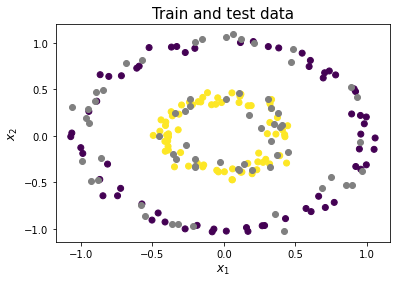

In [57]:
fig, ax = plt.subplots()
ax.scatter(X_train.x1, X_train.x2, c=y_train)
ax.scatter(X_test.x1, X_test.x2, c='grey')
ax.set(title='Train and test data', xlabel=r'$x_1$', ylabel=r'$x_2$')
plt.show()

### Define the classifier and fit

In [58]:
clf = svm.SVC()

clf.fit(X_train, y_train)

SVC()

### Test the classifier

In [59]:
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred, normalize='true')

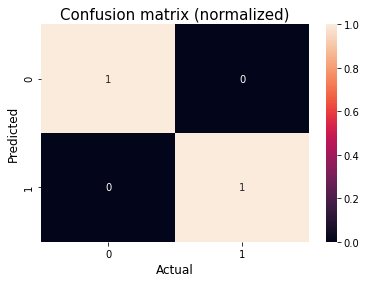

In [60]:
labels = ('0', '1')

fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, ax=ax)
ax.set(title='Confusion matrix (normalized)',
       xlabel='Actual', ylabel='Predicted',
       xticklabels=labels, yticklabels=labels)
plt.show()

### Plot the Decision Boundary

In [61]:
# Grid bounds
bounds = data_no_overlap[['x1', 'x2']].agg(('min', 'max')).T + [-0.075, 0.075]
h = (bounds['max'] - bounds['min']) / 100

# Grid
xx, yy = np.meshgrid(np.arange(bounds.loc['x1', 'min'], bounds.loc['x1', 'max'], h['x1']),
                     np.arange(bounds.loc['x2', 'min'], bounds.loc['x2', 'max'], h['x2']))

# Grid prediction
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

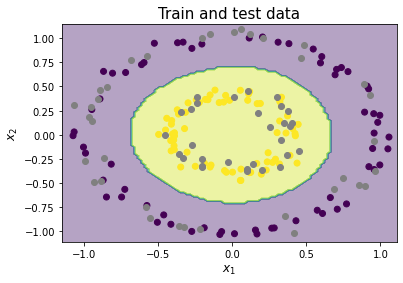

In [62]:
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X_train.x1, X_train.x2, c=y_train)
ax.scatter(X_test.x1, X_test.x2, c='grey')
ax.set(title='Train and test data', xlabel=r'$x_1$', ylabel=r'$x_2$')
plt.show()

## With Overlap
### Creating the data

In [63]:
X, y = datasets.make_circles(n_samples=200, factor=0.4, noise=0.33, random_state=42)

data_overlap = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=('x1', 'x2', 'targets'))

data_overlap

,x1,x2,targets
0,0.761402,-0.448111,0.0
1,0.699926,0.806582,0.0
2,-0.055809,0.571625,0.0
3,-0.606384,0.062435,1.0
4,-0.339556,0.849640,1.0
...,...,...,...
195,0.245880,0.010811,1.0
196,0.363991,0.590607,0.0
197,0.050396,-0.255822,0.0
198,0.228260,-0.415453,1.0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(data_overlap[['x1', 'x2']], data_overlap['targets'],
                                                    shuffle=True, test_size=0.33, random_state=42)

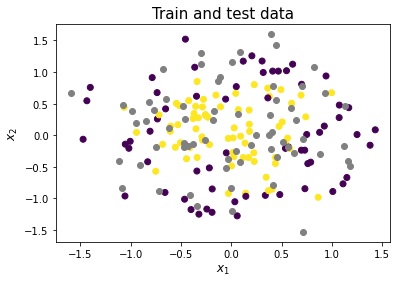

In [65]:
fig, ax = plt.subplots()
ax.scatter(X_train.x1, X_train.x2, c=y_train)
ax.scatter(X_test.x1, X_test.x2, c='grey')
ax.set(title='Train and test data', xlabel=r'$x_1$', ylabel=r'$x_2$')
plt.show()

### Defining the classifier and Fit

In [66]:
clf = svm.SVC()

clf.fit(X_train, y_train)

SVC()

In [67]:
y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred, normalize='true')

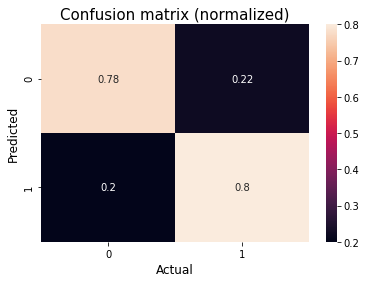

In [68]:
labels = ('0', '1')

fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, ax=ax)
ax.set(title='Confusion matrix (normalized)',
       xlabel='Actual', ylabel='Predicted',
       xticklabels=labels, yticklabels=labels)
plt.show()

### Plot the decision boundary

In [69]:
# Grid bounds
bounds = data_overlap[['x1', 'x2']].agg(('min', 'max')).T + [-0.075, 0.075]
h = (bounds['max'] - bounds['min']) / 100

# Grid
xx, yy = np.meshgrid(np.arange(bounds.loc['x1', 'min'], bounds.loc['x1', 'max'], h['x1']),
                     np.arange(bounds.loc['x2', 'min'], bounds.loc['x2', 'max'], h['x2']))

# Grid prediction
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

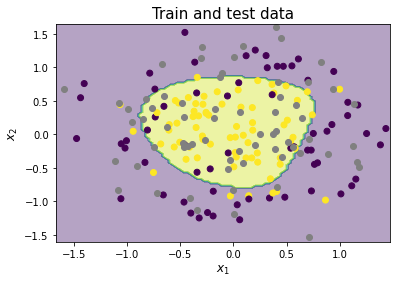

In [70]:
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X_train.x1, X_train.x2, c=y_train)
ax.scatter(X_test.x1, X_test.x2, c='grey')
ax.set(title='Train and test data', xlabel=r'$x_1$', ylabel=r'$x_2$')
plt.show()

## Breast Cancer

In [71]:
data_cancer = datasets.load_breast_cancer()
X, y = data_cancer.data, data_cancer.target

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    shuffle=True, test_size=0.33, random_state=42)

In [73]:
clf = svm.SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred, normalize='true')
tn, fp, fn, tp = confusion.ravel()


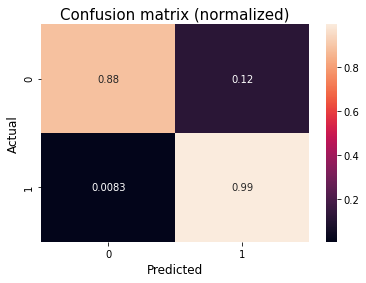

In [74]:
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, ax=ax)
ax.set(title='Confusion matrix (normalized)',
       xlabel='Predicted', ylabel='Actual',
       xticklabels=labels, yticklabels=labels)
plt.show()